Project: Introvert or Extrovert Prediction

Task: Data preparation

Candidate: Himantha Weerasingha

In [1]:
#Import libaries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define the path for dataset
pwd = os.getcwd()
dataset_path = f"{pwd}\\personality_dataset.csv"


In [3]:
# Load the dataset
df = pd.read_csv(dataset_path)
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
# Describe the dataset
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [ ]:
# Function to check for unwanted data (e.g. typos, unexpected values)

def mising_unwanted(data_frame):
    print('Sage_fear unique data: ', data_frame['Stage_fear'].unique())
    print('Drained_after_socializing unique data: ', data_frame['Drained_after_socializing'].unique())
    print('Personality unique data: ', data_frame['Personality'].unique())
    print("\nMissing Values")
    print(data_frame.isnull().sum())

In [ ]:
# Identified missing and unwanted values from the dataset
mising_unwanted(df)

Sage_fear unique data:  ['No' 'Yes' nan]
Drained_after_socializing unique data:  ['No' 'Yes' nan]
Personality unique data:  ['Extrovert' 'Introvert']

Missing Values
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [ ]:
# Drop missing values
# Assumption: Any missing value is considered erroneous, so the entire row is discarded
df_cleaned = df.dropna().copy()

In [ ]:
# Encode categorical columns in to numerical format for further analysis
# 'Yes' treated as 1 and 'No' treated as 0
#  Personality was treated as a binary classification problem (Introvert = 0, Extrovert = 1)
df_cleaned['Stage_fear'] = df_cleaned['Stage_fear'].map({'Yes': 1, 'No': 0})
df_cleaned['Drained_after_socializing'] = df_cleaned['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df_cleaned['Personality'] = df_cleaned['Personality'].map({'Introvert': 0, 'Extrovert': 1})

In [ ]:
# Identified missing and unwanted values from the datase
mising_unwanted(df_cleaned)

Sage_fear unique data:  [0 1]
Drained_after_socializing unique data:  [0 1]
Personality unique data:  [1 0]

Missing Values
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


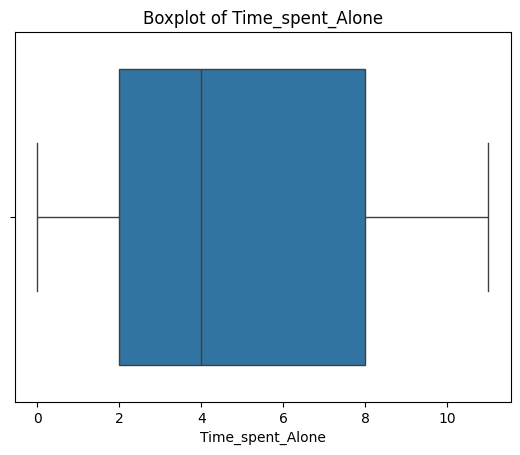

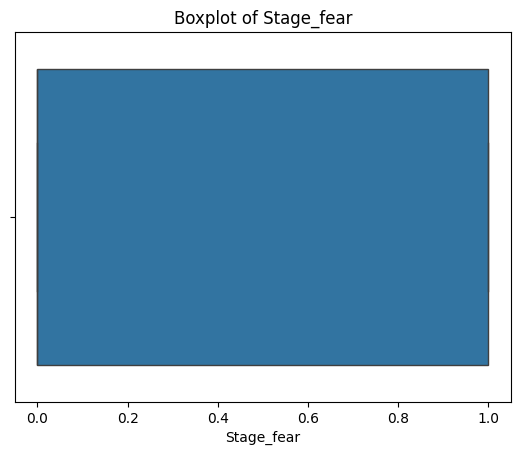

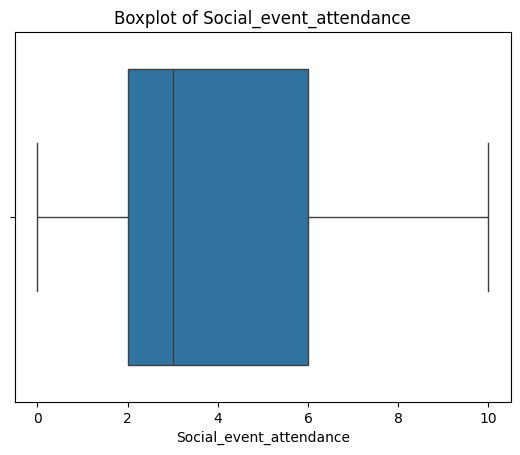

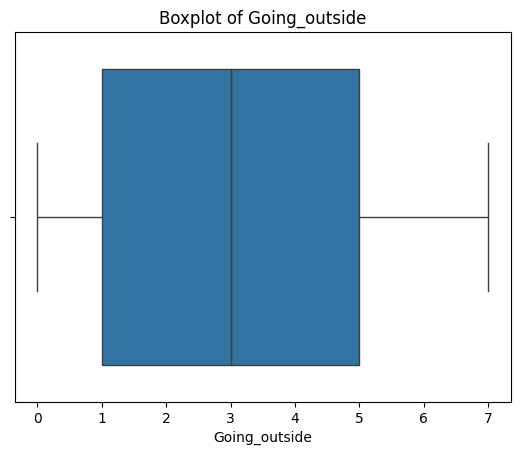

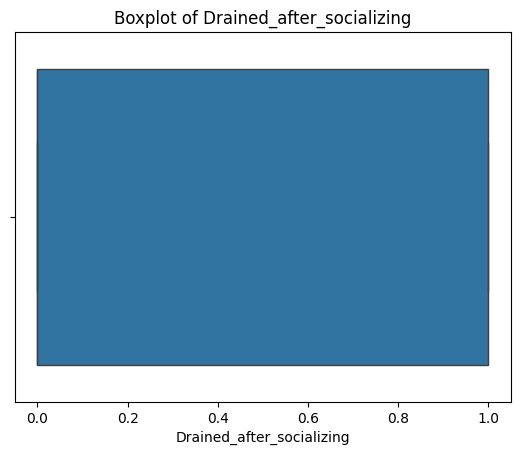

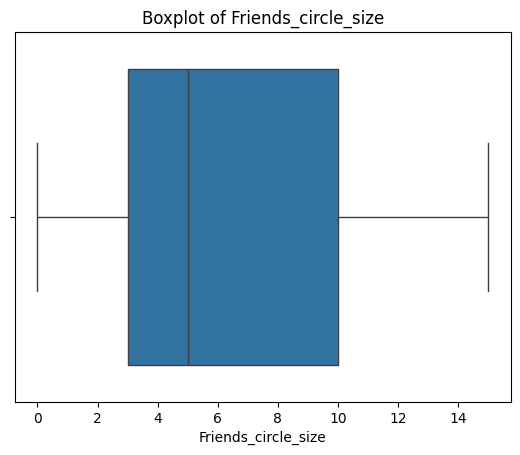

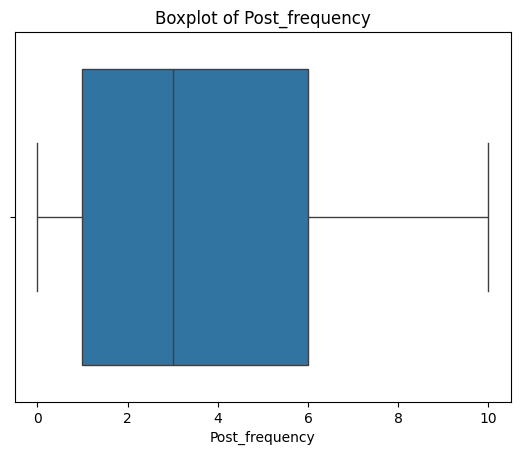

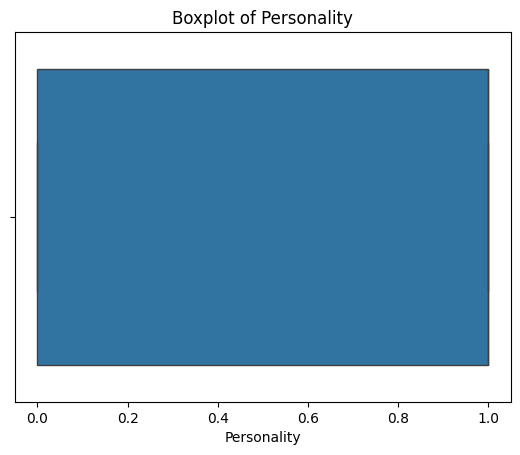

In [10]:
# Outliers detection using box plot visualization

numeric_cols = df_cleaned.select_dtypes(include='number').columns

for col in numeric_cols:
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Note: No outliers found

In [12]:
# Save the cleared dataset

df_cleaned.to_csv("Cleaned_dataset.csv", index=False)
